<a href="https://colab.research.google.com/github/denizd1/GEOL557_Project/blob/main/Week6_Moon_Group_LCROSS_Grids_Stats_2020_12_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

GEOL557 Week 6 Group Project

Characterization of the Lunar LCROSS volatile measurements and adjacent area

Britt Duffy Adkins, Hunter Danque, Deniz Donmez (December 6, 2020)

The LCROSS impact in the Cabeus crater and spectroscopic analysis of the ejecta plume is the only "ground truth" of volatiles in Lunar Permanently Shadowed Regions (PSRs). As such, it is used as a baseline for molecular abundance in PSRs at both lunar poles. Our goal is to take a more conservative approach and map the critical environmental characteristics of PSRs, Illumination, Temperature, Topography, and distance weighting from the LCROSS site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. 
We calculated and plot the Molecular and Elemental abundance from the LCROSS spectroscopic measurements. Most lunar resource work focuses on the water observed (~5% by weight) and Hydrogen and Oxygen for rocket fuel use. We want to show there are other valuable elemental resources observed in the ejecta plume, although some valuable elements like Carbon are in multiple molecules.


#Feedback Action Items
*   The replacment of default no data value with 0 in the avgvis illumination grid is making a spike in the KDE plots at zero. NaN should be used instead. 
*   Add more comments and description around the illumination grid. 

The feedback was implemented. 







In [350]:
from google.colab import drive # this mounts Google Drive to this notebook
drive.mount('/content/gdrive') # , force_remount=True

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


#Section 1-LCROSS Comparison of Molecular and Atomic Weight Percent

The goal of the first section is to make a dataframe of the molecular abundance from the LCROSS impact in the Cabeus crater near the Lunar South Pole. The original data is from (Colaprete, et al., 2010) Table 2.

Colaprete, A., Schultz, P., Heldmann, J., Wooden, D., Shirley, M., Ennico, K., . .. & Goldstein, D. (2010). Detection of water in the LCROSS ejecta plume. Science, 330(6003), 463-468.

These data were published in percentages relative to water. This is a hard way to read the data so Chris Dreyer and George Sowers converted them to weight percent. They provided the updated table to us in a personel communication Spring 2020.


In [351]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np


In [352]:
#first method of creating a pandas dataframe. In this we manually created a dictionary of the values and converted to a dataframe. 
#we also added in a column for sublimation temperature
data = {'Compound':['water', 'hydrogen sulfide', 'hydrogen gas', 'carbon monoxide', 'calcium', 'ammonia','mercury','magnesium','sulfur dioxide','ethylene','carbon dioxide','methanol','methane'],
        'Symbol':['H2O','H2S','H2','CO','Ca','NH3','Hg','Mg','SO2','C2H4','CO2','CH3OH','CH4'],
        'Concentration (wt%)':[5.5,0.92,0.69,0.57,0.4,0.33,0.24,0.19,0.18,0.17,0.12,0.09,0.04],
        'Temp (K)' : [106.6, 50.6, np.nan, 18.2, np.nan, 65.5, np.nan, np.nan, 62.3, np.nan, 54.3, np.nan, 22.0]}
df = pd.DataFrame(data)
df

Compound Symbol  Concentration (wt%)  Temp (K)
0              water    H2O                 5.50     106.6
1   hydrogen sulfide    H2S                 0.92      50.6
2       hydrogen gas     H2                 0.69       NaN
3    carbon monoxide     CO                 0.57      18.2
4            calcium     Ca                 0.40       NaN
5            ammonia    NH3                 0.33      65.5
6            mercury     Hg                 0.24       NaN
7          magnesium     Mg                 0.19       NaN
8     sulfur dioxide    SO2                 0.18      62.3
9           ethylene   C2H4                 0.17       NaN
10    carbon dioxide    CO2                 0.12      54.3
11          methanol  CH3OH                 0.09       NaN
12           methane    CH4                 0.04      22.0

In [353]:
pip install molmass #https://pypi.org/project/molmass/

In [354]:
from molmass import Formula

In [355]:

f = Formula('')

f_composition=[]
f_composition_total=[]
lenlen=[]

for molecule in df['Symbol']:
  #print(molecule)
  f = Formula(molecule)
  #print(f.isotope.mass)
  #print(f.composition().total)
  f_composition.append(f.isotope.mass)
  f_composition_total.append(f.composition())
  lenlen.append(len(f.composition()))
  #f_molecule=f.formula
  #print(f_composition)
  #print(f_molecule)


element_name=[]
element_number=[]
element_rel_mass=[]
element_frac=[]
for i in range(len(f_composition_total)):
  for k in range(lenlen[i]):
    element_name.append(f_composition_total[i][k][0])
    element_number.append(f_composition_total[i][k][1])
    element_rel_mass.append(f_composition_total[i][k][2])
    element_frac.append(f_composition_total[i][k][3])

#print(len(element_name),len(element_number),len(element_rel_mass),len(element_frac))

#create new dataframe that includes columns for element, number of atoms, element relative mass, and element fraction
new_frame={
    'VolatileCompound' : ['water','water','hydrogen sulfide','hydrogen sulfide','hydrogen gas','carbon monoxide','carbon monoxide','calcium','ammonia','ammonia','mercury','magnesium',
                  'sulfur dioxide','sulfur dioxide','ethylene','ethylene','carbon dioxide','carbon dioxide','methanol','methanol','methanol','methane','methane'],
    'Symbol' : ['H2O','H2O','H2S','H2S','H2','CO','CO','Ca','NH3','NH3','Hg','Mg','SO2','SO2','C2H4','C2H4','CO2','CO2','CH3OH','CH3OH','CH3OH','CH4','CH4'],
    'wt%' : [5.50,5.50,0.92,0.92,0.69,0.57,0.57,0.4,0.33,0.33,0.24,0.19,0.18,0.18,0.17,0.17,0.12,0.12,0.09,0.09,0.09,0.04,0.04],
    'Element': element_name,
    'Number' : element_number,
    'ElementRelMass' : element_rel_mass,
    'ElementFrac%' : element_frac
}
df_new_frame=pd.DataFrame(new_frame)
df_new_frame


VolatileCompound Symbol   wt% Element  Number  ElementRelMass  ElementFrac%
0              water    H2O  5.50       H       2        2.015882      0.111898
1              water    H2O  5.50       O       1       15.999405      0.888102
2   hydrogen sulfide    H2S  0.92       H       2        2.015882      0.059150
3   hydrogen sulfide    H2S  0.92       S       1       32.064800      0.940850
4       hydrogen gas     H2  0.69       H       2        2.015882      1.000000
5    carbon monoxide     CO  0.57       C       1       12.010740      0.428800
6    carbon monoxide     CO  0.57       O       1       15.999405      0.571200
7            calcium     Ca  0.40      Ca       1       40.078000      1.000000
8            ammonia    NH3  0.33       H       3        3.023823      0.177553
9            ammonia    NH3  0.33       N       1       14.006703      0.822447
10           mercury     Hg  0.24      Hg       1      200.592000      1.000000
11         magnesium     Mg  0.19      Mg       1       24.305100      1.000000
12    sulfur dioxide    SO2  0.18       O       2       31.998810      0.499485
13    sulfur dioxide    SO2  0.18       S       1       32.064800      0.500515
14          ethylene   C2H4  0.17       C       2       24.021480      0.856282
15          ethylene   C2H4  0.17       H       4        4.031764      0.143718
16    carbon dioxide    CO2  0.12       C       1       12.010740      0.272912
17    carbon dioxide    CO2  0.12       O       2       31.998810      0.727088
18          methanol  CH3OH  0.09       C       1       12.010740      0.374845
19          methanol  CH3OH  0.09       H       4        4.031764      0.125828
20          methanol  CH3OH  0.09       O       1       15.999405      0.499327
21           methane    CH4  0.04       C       1       12.010740      0.748682
22           methane    CH4  0.04       H       4        4.031764      0.251318

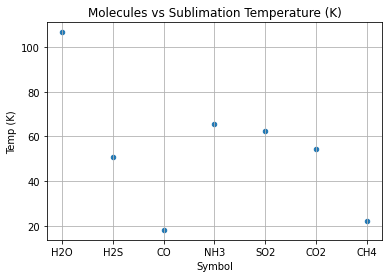

In [356]:
# Plot of Molecules vs Sublimation Temperature
df=df.dropna()
df.plot.scatter(x='Symbol', y='Temp (K)',grid=True);
plt.title('Molecules vs Sublimation Temperature (K)')
plt.show()

In [357]:
df_new_frame['ElementWt%']=df_new_frame['wt%']*(df_new_frame['ElementFrac%'])

In [358]:
df_new_frame

VolatileCompound Symbol   wt%  ... ElementRelMass  ElementFrac%  ElementWt%
0              water    H2O  5.50  ...       2.015882      0.111898    0.615441
1              water    H2O  5.50  ...      15.999405      0.888102    4.884559
2   hydrogen sulfide    H2S  0.92  ...       2.015882      0.059150    0.054418
3   hydrogen sulfide    H2S  0.92  ...      32.064800      0.940850    0.865582
4       hydrogen gas     H2  0.69  ...       2.015882      1.000000    0.690000
5    carbon monoxide     CO  0.57  ...      12.010740      0.428800    0.244416
6    carbon monoxide     CO  0.57  ...      15.999405      0.571200    0.325584
7            calcium     Ca  0.40  ...      40.078000      1.000000    0.400000
8            ammonia    NH3  0.33  ...       3.023823      0.177553    0.058593
9            ammonia    NH3  0.33  ...      14.006703      0.822447    0.271407
10           mercury     Hg  0.24  ...     200.592000      1.000000    0.240000
11         magnesium     Mg  0.19  ...      24.305100      1.000000    0.190000
12    sulfur dioxide    SO2  0.18  ...      31.998810      0.499485    0.089907
13    sulfur dioxide    SO2  0.18  ...      32.064800      0.500515    0.090093
14          ethylene   C2H4  0.17  ...      24.021480      0.856282    0.145568
15          ethylene   C2H4  0.17  ...       4.031764      0.143718    0.024432
16    carbon dioxide    CO2  0.12  ...      12.010740      0.272912    0.032749
17    carbon dioxide    CO2  0.12  ...      31.998810      0.727088    0.087251
18          methanol  CH3OH  0.09  ...      12.010740      0.374845    0.033736
19          methanol  CH3OH  0.09  ...       4.031764      0.125828    0.011325
20          methanol  CH3OH  0.09  ...      15.999405      0.499327    0.044939
21           methane    CH4  0.04  ...      12.010740      0.748682    0.029947
22           methane    CH4  0.04  ...       4.031764      0.251318    0.010053

[23 rows x 8 columns]

In [359]:
#Reorder dataframe by element weight %
df_new_frame_groupby=df_new_frame.groupby(by=df_new_frame['Element']).sum().reset_index()
df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)

Element   wt%  Number  ElementRelMass  ElementFrac%  ElementWt%
6       O  6.46       7      111.995835      3.185202    5.432240
2       H  7.74      21       21.166761      1.869466    1.464261
7       S  1.10       2       64.129600      1.441365    0.955674
0       C  0.99       6       72.064440      2.681521    0.486416
1      Ca  0.40       1       40.078000      1.000000    0.400000
5       N  0.33       1       14.006703      0.822447    0.271407
3      Hg  0.24       1      200.592000      1.000000    0.240000
4      Mg  0.19       1       24.305100      1.000000    0.190000

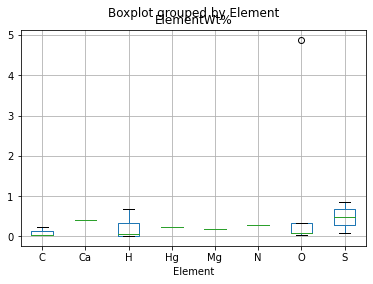

In [360]:
#Create boxplot grouped by Element Wt%
df_new_frame.boxplot(by ='Element', column =['ElementWt%']) 
plt.show()

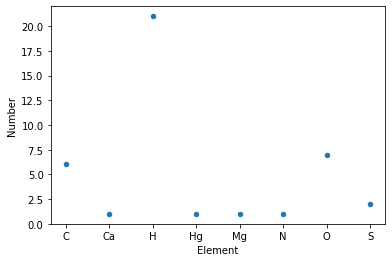

In [361]:
#Plot of element vs. number
df_new_frame_groupby.plot.scatter(x='Element', y='Number');
plt.show()

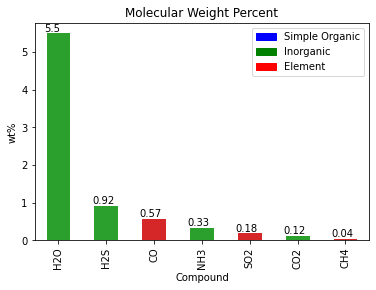

In [362]:
'''
Plot the Molecular Weight Percent from the LCROSS impact
C0 = blue, Simple Organic
C2 = green, Inorganic
C3 = red, Element
'''

colors = {'Simple Organic':'blue', 'Inorganic':'green', 'Element':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df.plot(x='Symbol', y='Concentration (wt%)', kind='bar', color=['C2','C2','C3','C2','C3','C2','C3','C3','C2','C0','C2','C0','C0'])  
plt.ylabel('wt%')
plt.xlabel('Compound')
plt.title('Molecular Weight Percent')
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x()-0.05 , p.get_height()+0.05 ))
plt.legend(handles, labels)
#plt.grid()
plt.show()

Figure 1. The Molecular Weight Percent from the LCROSS impact.

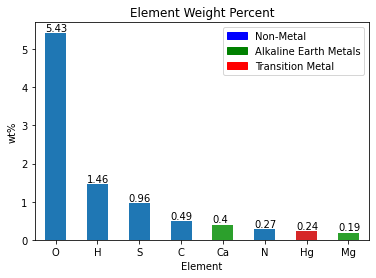

In [363]:
'''
Plot the Elemental Weight Percent
C0 = blue, non-metal
C2 = green, alkaline earth metals
C3 = red, transition metal
'''
colors = {'Non-Metal':'blue', 'Alkaline Earth Metals':'green', 'Transition Metal':'red'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]


df_elem_sort = df_new_frame_groupby.sort_values(by="ElementWt%",ascending=False)
df_elem_sort.plot(x='Element', y='ElementWt%', kind='bar', legend=False, rot=0, color=['C0','C0','C0','C0','C2','C0','C3','C2'])  
plt.ylabel('wt%')
plt.xlabel('Element')
plt.title('Element Weight Percent')
plt.legend(handles,labels)
all_axes = plt.gcf().get_axes()
ax = all_axes[0]

for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)), (p.get_x() , p.get_height()+0.05 ))
#plt.grid()
plt.show()

Figure 2. The Elemental Weight Percent from the LCROSS impact summed across the molecular components. These plots show that Oxygen is the most abundant element by weight percent. However, the valuable element Carbon is nearly 0.5% by weight in this PSR. This could be a valuable secondary commodity during the production of water for Hydrogen and Oxygen rocket fuel.

Figure #. These plots show that Oxygen is the most abundant element by weight percent. However, the valuable element Carbon is nearly 0.5% by weight in this PSR. This could be a valuable secondary commodity during the production of water for Hydrogen and Oxygen rocket fuel. 

#Section 2 Geospatial Plotting of Lunar Rasters and Shapefile to Characterize the Cabeus Crater LCROSS impact site

We map the critical environmental characteristics of PSRs, inccluding Illumination, Temperature, Topography, and distance from the LCROSS impact site to have a semi-quantitative view of how far that "one" measurement can be extrapolated within the Cabeus crater. 

In [364]:
%pip install earthpy #package for geospatial data manipulation that is a front end for GeoPandas among others

In [365]:
import pandas as pd
import numpy as np
import earthpy as et
import earthpy.plot as ep
import earthpy.spatial as es
import rasterio as rio
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from rasterio.plot import plotting_extent
from osgeo import gdal
import geopandas as gpd
import os

import seaborn as sns
import scipy.stats as stats

#Contour parameters. 
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar #need those for scalebar
import matplotlib.font_manager as fm
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
fontprops = fm.FontProperties(size=18)

In [366]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles

/content/gdrive/Shared drives/GEOL557_Group_Project/data/Shapefiles


In [367]:
Cabeus_Clipping=gpd.read_file('Cabeus_Clipping.shp')
Crashed_Spacecraft_LCROSS_Centaur=gpd.read_file('Crashed_Spacecraft_LCROSS_Centaur.shp')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15=gpd.read_file('Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.shp')
Crashed_Spacecraft_LCROSS=gpd.read_file('Crashed_Spacecraft_LCROSS.shp')
PSRs_Cabeus_clp=gpd.read_file('PSRs_Cabeus_clp.shp')
SPole_Crater_Namesp=gpd.read_file('SPole_Crater_Names.shp')
Spole_DEM1000m_Contours_clp=gpd.read_file('Spole_DEM1000m_Contours_clp.shp')
USGS_LinearFeatures_Cabeus=gpd.read_file('USGS_LinearFeatures_Cabeus.shp')

In [368]:
Spole_DEM1000m_Contours_clp

OBJECTID  ...                                           geometry
0           1  ...  LINESTRING (-55248.333 151675.000, -55247.857 ...
1           2  ...  LINESTRING (-71905.000 146709.444, -71909.167 ...
2           3  ...  LINESTRING (-74715.000 147265.000, -74721.667 ...
3           4  ...  LINESTRING (-74250.000 149005.000, -74250.000 ...
4           5  ...  LINESTRING (-74099.000 149549.000, -74095.000 ...
..        ...  ...                                                ...
528       529  ...  LINESTRING (-115892.500 44000.000, -115905.000...
529       530  ...  MULTILINESTRING ((-132771.000 44000.000, -1327...
530       531  ...  LINESTRING (-35300.000 72117.857, -35301.364 7...
531       532  ...  LINESTRING (-35300.000 57027.857, -35301.364 5...
532       533  ...  LINESTRING (-83237.500 44000.000, -83245.000 4...

[533 rows x 5 columns]

In [369]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
AVGVISIB_85S_060M_201608_clp20m.tfw
AVGVISIB_85S_060M_201608_clp20m.tif
AVGVISIB_85S_201608_clp240m_stat.tfw
AVGVISIB_85S_201608_clp240m_stat.tif
AVGVIS_SUN60m.tif
polar_south_80_summer_max_sp240m_clp_float20m.tif
polar_south_80_summer_max_sp240m_clp_int16_20m.tfw
polar_south_80_summer_max_sp240m_clp_int16_20m.tif
polar_south_80_summer_max_sp240m_stat.tfw
polar_south_80_summer_max_sp240m_stat.tif
Shapefiles/
spoledem10m_clp20m.tfw
spoledem10m_clp20m.tif
spoledem10m_clp240m_stat.tfw
spoledem10m_clp240m_stat.tif
zold_data/


In [370]:
with rio.open('spoledem10m_clp20m.tif') as spDEM: #open the geotif file with RasterIO
      spDEM_np= spDEM.read(1)
      spDEM_plot_extent = plotting_extent(spDEM)
      
with rio.open('AVGVISIB_85S_060M_201608_clp20m.tif') as avgvis: #open the geotif file with RasterIO
      avgvis_np= avgvis.read(1)
      avgvis_plot_extent = plotting_extent(avgvis)

with rio.open('polar_south_80_summer_max_sp240m_clp_int16_20m.tif') as spTempSumMax: #open the geotif file with RasterIO
      spTempSumMax_np= spTempSumMax.read(1)
      spTempSumMax_plot_extent = plotting_extent(spTempSumMax)

In [371]:
spDEM_plot_extent #It defines the coordinates as a tuple in the appropriate order for matplotlib as:(leftmost coordinate, rightmost coordinate, bottom coordinate, top coordinate)

(-151500.0, -35300.0, 44000.0, 151680.0)

In [372]:
spDEM.crs

CRS.from_wkt('PROJCS["Moon2000_sp",GEOGCS["GCS_Moon_2000",DATUM["D_Moon_2000",SPHEROID["Moon_2000_IAU_IAG",1737400,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433]],PROJECTION["Polar_Stereographic"],PARAMETER["latitude_of_origin",-90],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]]]')

In [373]:
spDEM_np #numpy array 
df_spDEM = pd.DataFrame(data=spDEM_np) #Numpy array to Pandas dataframe
df_spDEM.iloc[0:5, 0:10] #look at a corner of the data array

0    1    2    3    4    5    6    7    8    9
0 -656 -657 -658 -660 -661 -661 -663 -664 -665 -665
1 -656 -657 -658 -659 -660 -661 -662 -663 -664 -665
2 -656 -657 -658 -659 -660 -661 -662 -663 -663 -665
3 -656 -657 -657 -658 -660 -661 -662 -662 -663 -664
4 -657 -657 -658 -659 -660 -661 -661 -662 -663 -664

In [374]:
#Modify the no data value from 32767 to np.nan (It was replaced with zero originally. Cahill suggested this change to prevent a spike in the KDE at zero)
avgvis_np=np.where(avgvis_np==32767, np.nan, avgvis_np) 
df_avgvis = pd.DataFrame(data=avgvis_np) #Numpy array to Pandas dataframe
avgvis_np #numpy array 

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan],
       ...,
       [   0.,    0.,    0., ..., 2003., 2003., 2003.],
       [   0.,    0.,    0., ..., 2003., 2003., 2003.],
       [   0.,    0.,    0., ..., 2003., 2003., 2003.]])

In [375]:
spTempSumMax_np #numpy array 
spTempSumMax_np=np.where(spTempSumMax_np==32767, np.nan, spTempSumMax_np) #Modify the no data value from 32767 to NaN
df_spTempSumMax_np = pd.DataFrame(data=spTempSumMax_np) #Numpy array to Pandas dataframe
spTempSumMax_np

array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ...,
       [135., 135., 135., ..., 207., 207., 207.],
       [135., 135., 135., ..., 207., 207., 207.],
       [135., 135., 135., ..., 207., 207., 207.]])

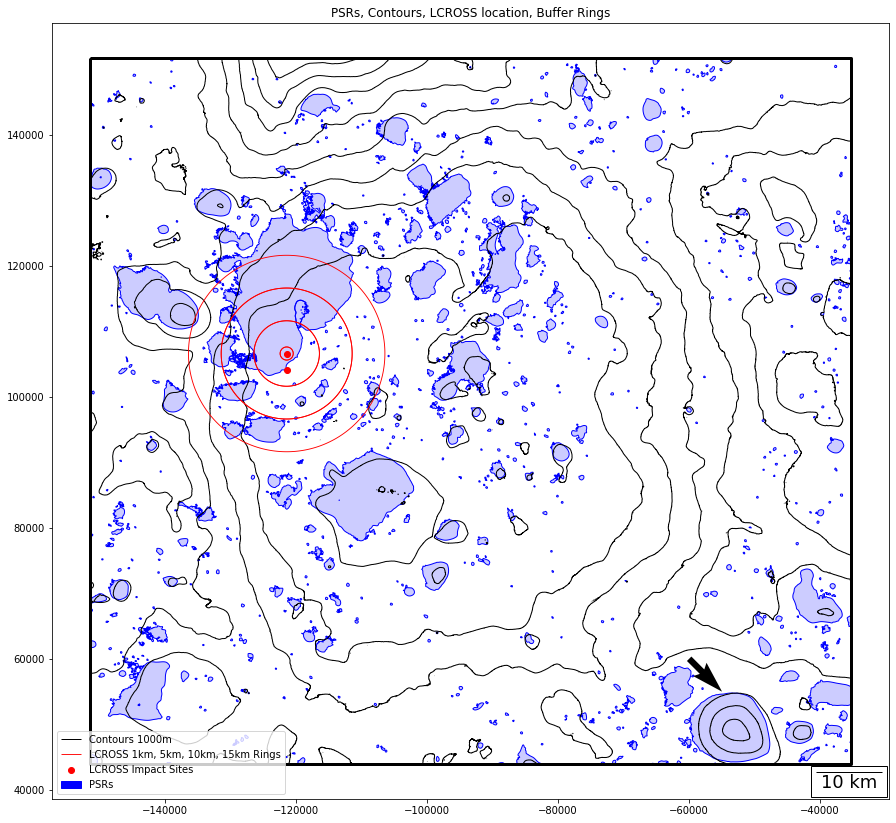

In [376]:
#Display imported shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Shapefiles 
Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("PSRs, Contours, LCROSS location, Buffer Rings")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')

handles.append(blue_patch)
labels.append('PSRs')

ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 3. The shapefiles imported from ArcGIS to provide context for the LCROSS impact site. The blue PSR blobs are the locations that have temperatres below the water stability temperature 110 K. The arrow points to Lunar South Pole.

In [377]:
# Plot the DEM and hillshade at the same time
# https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_dem_hillshade.html
hillshade = es.hillshade(df_spDEM, azimuth=315, altitude=45)

#hillshade = es.hillshade(df_avgvis, azimuth=-30, altitude=30)

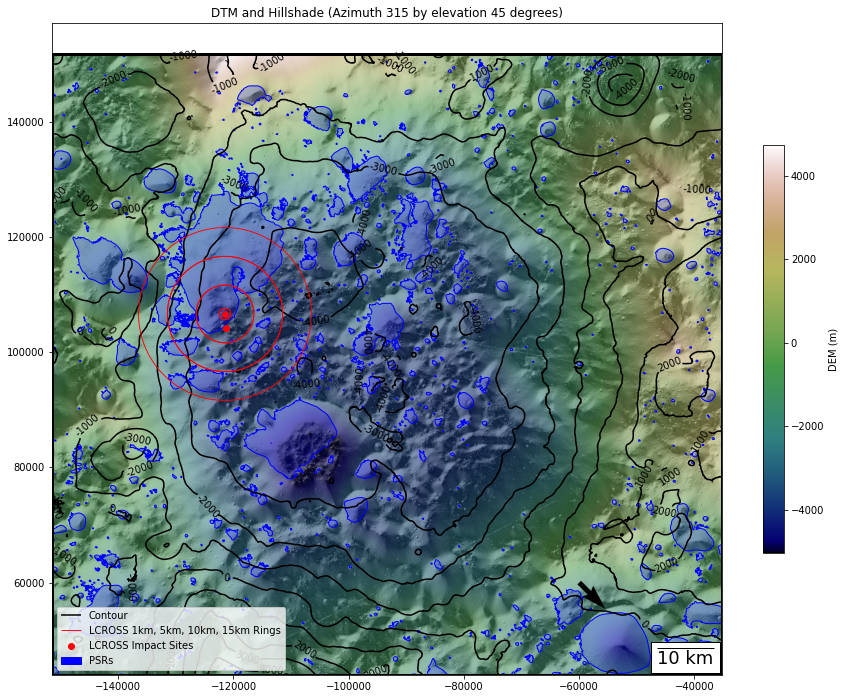

In [378]:
#Plot DEM, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()


# ep.plot_bands(
#     df_spDEM,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_spDEM, cmap="gist_earth", extent=spDEM_plot_extent)
#im1 = ax1.imshow(f(x, y), cmap=plt.get_cmap('viridis'), animated=True)
fig.colorbar(im, ax=ax, shrink=.5, label='DEM (m)')

#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spDEM_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("DTM and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 4. DEM of Lunar South Pole original 10 m resampled to 20 m. Arrow points to Lunar South Pole and also shows the artifical Hillshade lighting direction.  
Reference: 

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m.jp2

https://pds-geosciences.wustl.edu/lro/lro-l-lola-3-rdr-v1/lrolol_1xxx/data/lola_gdr/polar/jp2/ldem_875s_10m_jp2.lbl

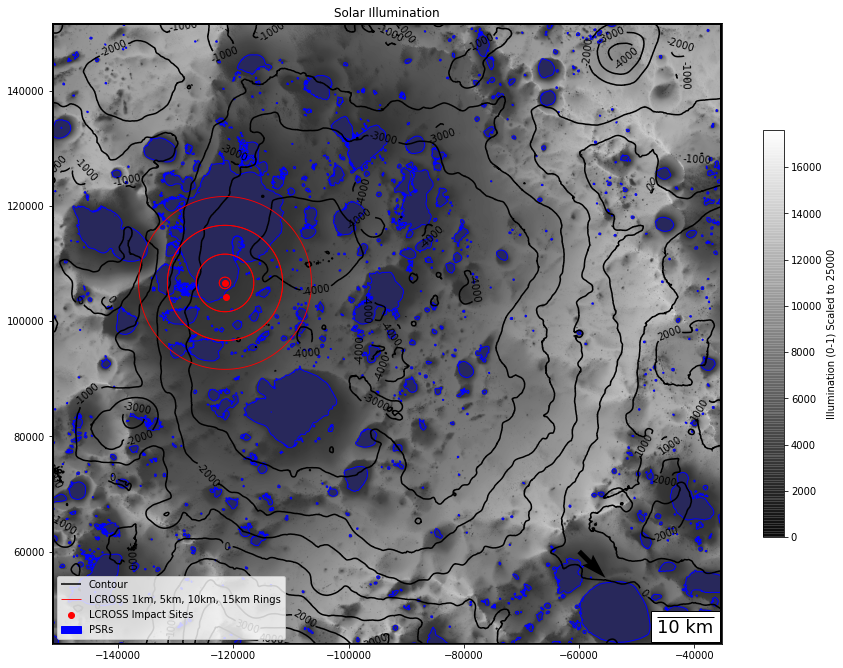

In [379]:
#plot the illumination, shapefiles, and contours
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
#ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 500)), cmap = "Greys") 
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')
#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     df_avgvis,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spDEM_plot_extent   
# )
im=ax.imshow(df_avgvis, cmap="gray", extent=avgvis_plot_extent, alpha=.8)
fig.colorbar(im, ax=ax, shrink=.5, label='Illumination (0-1) Scaled to 25000')

#Overlay hillshade with alpha transparance
#ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=avgvis_plot_extent)

scalebar = AnchoredSizeBar(ax.transData,
                           10000, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Solar Illumination")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)


blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 5. Illumination of Lunar South Pole original 60 m resampled to 20 m. Arrow points to Lunar South Pole.
Reference: 
Mazarico, E., et al. (2011), Illumination conditions of the lunar polar regions using LOLA topography, Icarus, Vol. 211, pp. 1066-1081, doi:10.1016/j.icarus.2010.10.030.

https://pgda.gsfc.nasa.gov/products/69
http://imbrium.mit.edu/EXTRAS/ILLUMINATION/JP2/AVGVISIB_85S_060M_201608.JP2


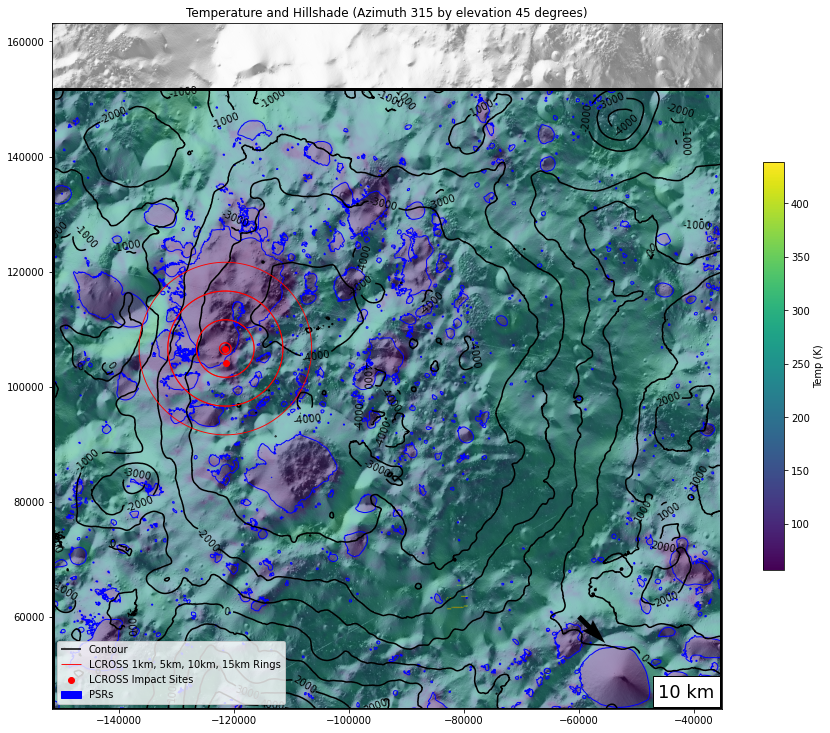

In [380]:
#Temperature, hillshade, contours, and shapefiles
fig, ax = plt.subplots(figsize=(15, 15))

#Create contour plot at specified range of values
CS=ax.contour(spDEM_np,  levels = list(range(-5000, 5000, 1000)), colors = "black", extent=spDEM_plot_extent)
#CStemp=ax.contour(spTempSumMax_np,  levels = list(range(0, 400, 100)), colors = "red", extent=spTempSumMax_plot_extent)
plt.clabel(CS, fontsize=10, inline=1,fmt = '%1.0f',levels = list(range(-5000, 5000, 1000)))
CS.collections[0].set_label('Contour')

#Shapefiles 
#Spole_DEM1000m_Contours_clp.plot(ax=ax,color='k', linewidth=1, label='Contours 1000m') #the boundary method only plots the outlines with no fill
#PSRs_Cabeus_clp.plot(ax=ax, edgecolor='none', facecolor='b', alpha=0.2, label='PSRs')
PSRs_Cabeus_clp.plot(ax=ax, edgecolor='b', facecolor='none', linewidth=1, label='PSRs')
Crashed_Spacecraft_LCROSS_Centuar_1_5_10_15.boundary.plot(ax=ax, edgecolor='r', linewidth=0.9, label="LCROSS 1km, 5km, 10km, 15km Rings")
Crashed_Spacecraft_LCROSS.plot(ax=ax, color='r', label='LCROSS Impact Sites')
Cabeus_Clipping.plot(ax=ax, facecolor='none', edgecolor='k', linewidth=3)
ax.set_aspect('equal')
handles, labels = ax.get_legend_handles_labels()

# ep.plot_bands(
#     spTempSumMax_np,
#     ax=ax,
#     cmap="gist_earth",
#     title="DTM and Hillshade (Azimuth 315 by elevation 45 degrees",
#     extent=spTempSumMax_plot_extent   
# )
im=ax.imshow(spTempSumMax_np, cmap="viridis", extent=spTempSumMax_plot_extent)
fig.colorbar(im, ax=ax, shrink=.5, label='Temp (K)')
#Overlay hillshade with alpha transparance
ax.imshow(hillshade, cmap="Greys", alpha=0.5, extent=spTempSumMax_plot_extent)
#Create contour plot at specified range of values
#ax.contour(spTempSumMax_np,  levels =  list(110), color = "red",) 

scalebar = AnchoredSizeBar(ax.transData,
                           10, '10 km', 'lower right', 
                           pad=0.3,
                           color='k',
                           frameon=True,
                           size_vertical=5,
                           fontproperties=fontprops)

ax.title.set_text("Temperature and Hillshade (Azimuth 315 by elevation 45 degrees)")

ax.add_artist(scalebar)
ax.quiver(-60000, 60000, 10000, -10000)
ax.axes.xaxis.set_visible(True)
ax.axes.yaxis.set_visible(True)

blue_patch = mpatches.Patch(color='b')
handles.append(blue_patch)
labels.append('PSRs')
ax.legend(handles, labels, loc='lower left' )

plt.show()

Figure 6. Temperature of Lunar South Pole original 240 m resampled to 40 m. Arrow points to Lunar South Pole. The area in the blue shade of the PSR polygon (less than 110 K for water ice stability). To the north of the impact location it appears to have similar conditions further away from the LCROSS impact site. South and east of the site the conditions change within a couple of kilometers of the impact site. 

Reference:

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_sw_max_diff.txt

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/additional_maps/polar_north_80_summer_max.txt
____________________
README for Seasonal Polar Temperatures on the Moon

http://luna1.diviner.ucla.edu/~jpierre/diviner/level4_polar/aareadme.txt

#Statistics of Solar Illumination Grids Maximum Summer Temperature

In [381]:
print("Shape of DEM", spDEM_np.shape, "AvgVis", avgvis_np.shape, "Temp", spTempSumMax_np.shape)

Shape of DEM (5384, 5810) AvgVis (5388, 5811) Temp (5964, 5820)


The average solar illumination over several years. This defines the locations of Permanently Shadowed Regions. 

In [382]:
#The statistics fail on the 31 million samples in the full grids so we clip out a postage stamp of 1 million grid cells for statistics. 
avgvis1k1k_np=avgvis_np[1000:4000,1000:4000]

In [383]:
# Flatten the array and remove nan 
avgvis_np_flat = np.ndarray.flatten(avgvis1k1k_np)
avgvis_np_flat = avgvis_np_flat[np.logical_not(np.isnan(avgvis_np_flat))]/25000*100 #drop the nan 
avgvis_np_flat.shape

(9000000,)

In [384]:
# subsample two flat arrays
idx1000000 = np.random.randint( 0, avgvis_np_flat.shape[0], 1000000)
idx10000 = np.random.randint( 0, avgvis_np_flat.shape[0], 10000)
idx1000 = np.random.randint( 0, avgvis_np_flat.shape[0], 1000)
idx100 = np.random.randint( 0, avgvis_np_flat.shape[0], 100)

In [385]:
#Resample the grid
"""
Original method did not allow comparision bvetween grids
avgvis_resamp10000 = np.random.choice(avgvis_np_flat, 10000)
avgvis_resamp1000 = np.random.choice(avgvis_np_flat, 1000)
avgvis_resamp100 = np.random.choice(avgvis_np_flat, 100)
"""
avgvis_resamp1000000 = avgvis_np_flat[idx1000000]
avgvis_resamp10000 = avgvis_np_flat[idx10000]
avgvis_resamp1000 = avgvis_np_flat[idx1000]
avgvis_resamp100 = avgvis_np_flat[idx100]

print('number of original illumination grid cells:',len(avgvis_np_flat))
print('length of resampled illumination:',len(avgvis_resamp1000000))
print('length of resampled illumination:',len(avgvis_resamp10000))
print('length of resampled illumination:',len(avgvis_resamp1000))
print('length of resampled illumination:',len(avgvis_resamp100))

number of original illumination grid cells: 9000000
length of resampled illumination: 1000000
length of resampled illumination: 10000
length of resampled illumination: 1000
length of resampled illumination: 100


In [386]:
#Descriptive statistics 
print("Max of illumination is {}".format(avgvis_np_flat.max()))
print("Min of illumination is {}".format(avgvis_np_flat.min()))
print("Mean of illumination is {}".format(avgvis_np_flat.mean().round(3)))
print("Median of illumination is {}".format(np.median(avgvis_np_flat)))
print("Standard Deviation of illumination is {}".format(avgvis_np_flat.std().round(3)))
print("Variance of illumination is {}".format(avgvis_np_flat.var().round(3)))

Max of illumination is 36.332
Min of illumination is 0.0
Mean of illumination is 7.529
Median of illumination is 5.4719999999999995
Standard Deviation of illumination is 7.774
Variance of illumination is 60.431


Temperature

In [387]:
#The statistics fail on the 31 million samples in the full grids so we clip out a postage stamp of 1 million grid cells for statistics. 
spTempSumMax1k1k_np=spTempSumMax_np[1000:4000,1000:4000]

In [388]:
# Flatten the array and remove nan 
spTempSumMax_flat = np.ndarray.flatten(spTempSumMax1k1k_np)
spTempSumMax_flat = spTempSumMax_flat[np.logical_not(np.isnan(spTempSumMax_flat))]
spTempSumMax_flat.shape

(9000000,)

In [389]:
#Resample the grid
"""
temperature_resamp1000000 = np.random.choice(spTempSumMax_flat, 1000000)
temperature_resamp10000 = np.random.choice(spTempSumMax_flat, 10000)
temperature_resamp1000 = np.random.choice(spTempSumMax_flat, 1000)
temperature_resamp100 = np.random.choice(spTempSumMax_flat, 100)
temperature_resamp10 = np.random.choice(spTempSumMax_flat, 10)
"""

temperature_resamp1000000 = spTempSumMax_flat[idx1000000]
temperature_resamp10000 = spTempSumMax_flat[idx10000]
temperature_resamp1000 = spTempSumMax_flat[idx1000]
temperature_resamp100 = spTempSumMax_flat[idx100]


print('number of original temperature grid cells:',len(spTempSumMax_flat))
print('length of resampled temperature:',len(temperature_resamp1000000))
print('length of resampled temperature:',len(temperature_resamp10000))
print('length of resampled temperature:',len(temperature_resamp1000))
print('length of resampled temperature:',len(temperature_resamp100))


number of original temperature grid cells: 9000000
length of resampled temperature: 1000000
length of resampled temperature: 10000
length of resampled temperature: 1000
length of resampled temperature: 100


In [390]:
#Descriptive statistics of the 1 million point grid
print("Max of temperature is {}".format(spTempSumMax_flat.max()))
print("Min of temperature is {}".format(spTempSumMax_flat.min()))
print("Mean of temperature is {}".format(spTempSumMax_flat.mean().round(3)))
print("Median of temperature is {}".format(np.median(spTempSumMax_flat)))
print("Standard Deviation of temperature is {}".format(spTempSumMax_flat.std().round(3)))
print("Variance of temperature is {}".format(spTempSumMax_flat.var().round(3)))

Max of temperature is 299.0
Min of temperature is 57.0
Mean of temperature is 185.932
Median of temperature is 206.0
Standard Deviation of temperature is 61.92
Variance of temperature is 3834.083


In [391]:
#Descriptive statistics of the 1000 resample to compare values
print("Max of temperature resample1000 is {}".format(temperature_resamp1000.max()))
print("Min of temperature resample1000 is {}".format(temperature_resamp1000.min()))
print("Mean of temperature resample1000 is {}".format(temperature_resamp1000.mean().round(3)))
print("Median of temperature resample1000 is {}".format(np.median(temperature_resamp1000)))
print("Standard Deviation of temperature resample1000 is {}".format(temperature_resamp1000.std().round(3)))
print("Variance of temperature resample1000 is {}".format(temperature_resamp1000.var().round(3)))

Max of temperature resample1000 is 296.0
Min of temperature resample1000 is 62.0
Mean of temperature resample1000 is 185.255
Median of temperature resample1000 is 203.5
Standard Deviation of temperature resample1000 is 61.757
Variance of temperature resample1000 is 3813.93


The subsample is a fairly close representation of the full data.

#Plots and Figures

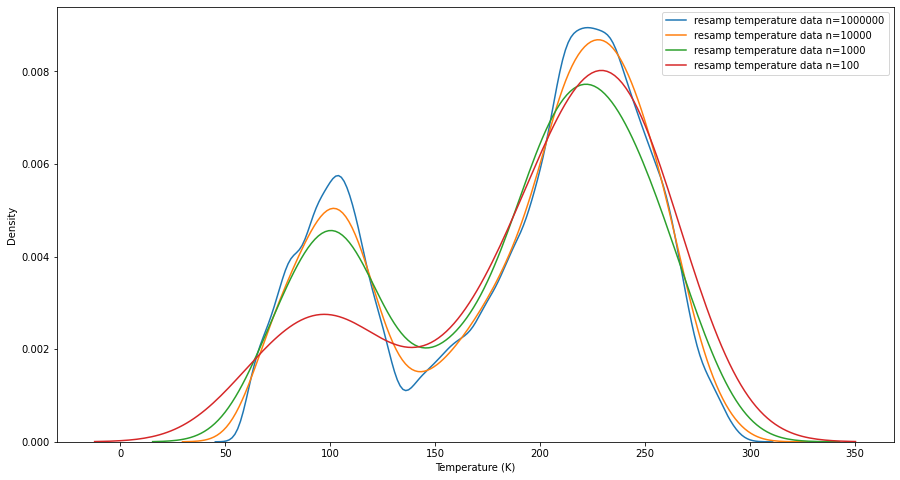

In [392]:
fig = plt.subplots(figsize=[15,8])
#sns.kdeplot(spTempSumMax_flat,label='all temperature data') #data

sns.kdeplot(temperature_resamp1000000, label='resamp temperature data n=1000000'); # resampled
sns.kdeplot(temperature_resamp10000, label='resamp temperature data n=10000'); # resampled
sns.kdeplot(temperature_resamp1000, label='resamp temperature data n=1000'); # resampled
sns.kdeplot(temperature_resamp100, label='resamp temperature data n=100'); # resampled
#sns.kdeplot(temperature_resamp10, label='resamp temperature data n=10'); # resampled

plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

Domain implications: The PSRs have a temperature cluster around 100K and the sunlit areas have a wider range of temperatures. 

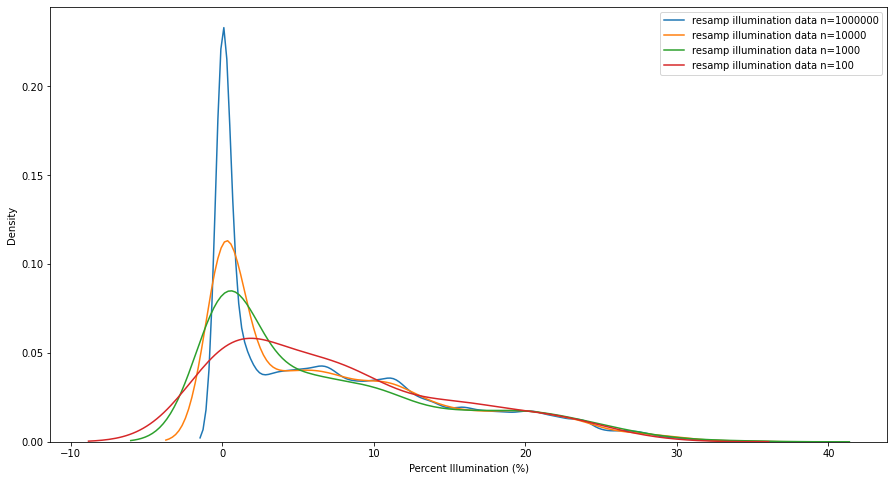

In [393]:
fig = plt.subplots(figsize=[15,8])
#sns.kdeplot(spTempSumMax_flat,label='all temperature data') #data

sns.kdeplot(avgvis_resamp1000000, label='resamp illumination data n=1000000'); # resampled
sns.kdeplot(avgvis_resamp10000, label='resamp illumination data n=10000'); # resampled
sns.kdeplot(avgvis_resamp1000, label='resamp illumination data n=1000'); # resampled
sns.kdeplot(avgvis_resamp100, label='resamp illumination data n=100'); # resampled

plt.xlabel('Percent Illumination (%)')
plt.legend()
plt.show()

Domain implications: We chose a Permanently Shadowed Region for analysis with some of the surrounding hills. The distribution is heavially skwed to the low illumination. 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


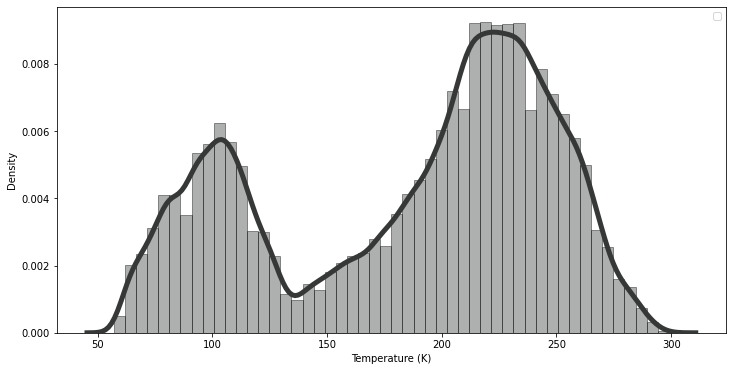

In [394]:
#The distplot function crashed Colab with the full grid. We had to use a subsampled vector to plot with the distplot function. 
fig, ax1 = plt.subplots(figsize=[12,6]) #, sharex=True)
sns.distplot(temperature_resamp1000000,ax=ax1, hist=True, color='xkcd:dark grey', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5))
plt.xlabel('Temperature (K)')
plt.legend()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


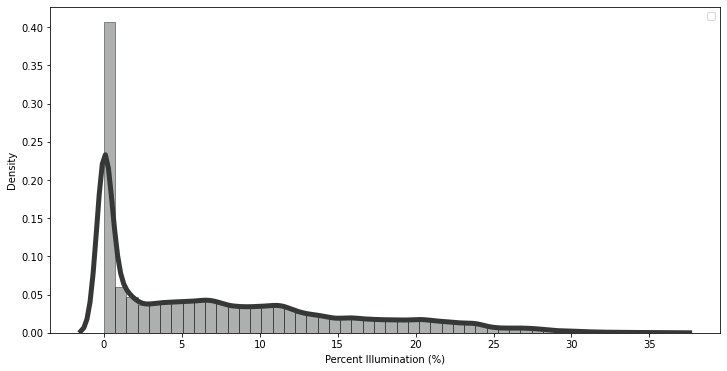

In [395]:
#The distplot function crashed Colab with the full grid. We had to use a subsampled vector to plot with the distplot function. 
fig, ax1 = plt.subplots(figsize=[12,6]) 
sns.distplot(avgvis_resamp1000000,ax=ax1, hist=True, color='xkcd:dark grey', hist_kws=dict(edgecolor="black"), kde_kws=dict(linewidth=5))
plt.xlabel('Percent Illumination (%)')
plt.legend()
plt.show()

In [419]:
#T-test-Parametric. 
#(ttest_ind(a, b[, axis, equal_var, nan_policy]. Calculate the T-test for the means of two independent samples of scores.)
print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000000, avgvis_resamp1000000)) # 
print('T-test  resampledata =',stats.ttest_ind(temperature_resamp1000, avgvis_resamp1000),'\n') #

#K-S test-non-parametric.
#ks_2samp(data1, data2[, alternative, mode]). Compute the Kolmogorov-Smirnov statistic on 2 samples.
print('K-S test resample data =',stats.ks_2samp(temperature_resamp1000000, avgvis_resamp1000000)) #
print('K-S test resample data =',stats.ks_2samp(temperature_resamp1000, avgvis_resamp1000),'\n') #


#Third test-Parametric. levene(*args, **kwds). Perform Levene test for equal variances.
from scipy.stats import levene
print('Levene test: resample1000000 data =',stats.levene(temperature_resamp1000000, avgvis_resamp1000000))
#print('Levene test:mean.   channel resample log10 data =',stats.levene(channel_mud_resamp, channel_sand_resamp, center='mean'))  # ‘mean’ : Recommended for symmetric, moderate-tailed distributions.
print('Levene test:median. resample1000 data =',stats.levene(temperature_resamp1000000, avgvis_resamp1000000, center='median'))# ‘median’ : Recommended for skewed (non-normal) distributions>

T-test  resampledata = Ttest_indResult(statistic=2859.948093504386, pvalue=0.0)
T-test  resampledata = Ttest_indResult(statistic=91.29695445389589, pvalue=0.0) 

K-S test resample data = Ks_2sampResult(statistic=1.0, pvalue=0.0)
K-S test resample data = Ks_2sampResult(statistic=1.0, pvalue=0.0) 

Levene test: resample1000000 data = LeveneResult(statistic=1224851.6582126103, pvalue=0.0)
Levene test:median. resample1000 data = LeveneResult(statistic=1224851.6582126103, pvalue=0.0)


We are not sure what is going on with the parametric and non-parametric tests. The odd results may result from the bimodal distribution of the temperature and the right skewed nature of the illumination. 

##Regressions

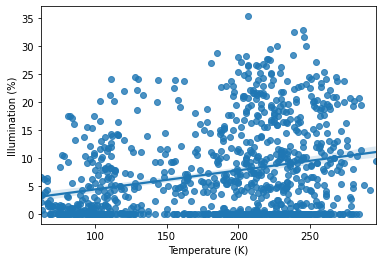

In [397]:
#regression order=. Lower illumination are generally showing lower temperatures. 
#There are a line of suspect values near the zero illumination with range of temperatures. These should be investigated.  
sns.regplot(x=temperature_resamp1000,y=avgvis_resamp1000, order=1,)
plt.xlabel('Temperature (K)')
plt.ylabel('Illumination (%)')
plt.show()

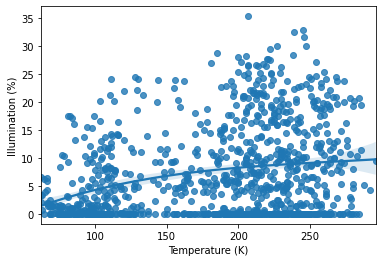

In [398]:
#regression order=. Lower illumination are generally showing lower temperatures. 
#There are a line of suspect values near the zero illumination with range of temperatures. These should be investigated.  
sns.regplot(x=temperature_resamp1000,y=avgvis_resamp1000, order=3,)
plt.xlabel('Temperature (K)')
plt.ylabel('Illumination (%)')
plt.show()

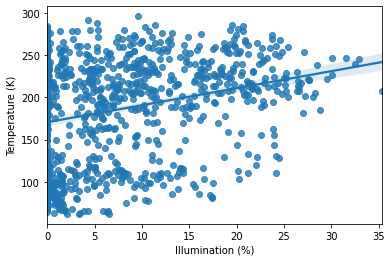

In [399]:
# Clustering is visible. There are still a suprising number of values with low temp and illumination greater than zero. 
sns.regplot(x= avgvis_resamp1000,y= temperature_resamp1000)
plt.ylabel('Temperature (K)')
plt.xlabel('Illumination (%)')
plt.show()

The regressions show some trends but there is a great deal of noise in the data. This may be a source of trouble with the parametric and non-parametric tests. 

#Extra Stuff

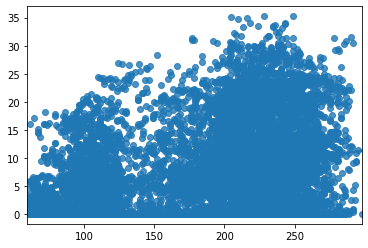

In [400]:
#regression order=1. The clustering around 100k and between 200-300 is visible and a line can fit it but is not predictive. 
from scipy.interpolate import interp1d

def downsample(array, npts):
    interpolated = interp1d(np.arange(len(array)), array, axis = 0, fill_value = 'extrapolate')
    downsampled = interpolated(np.linspace(0, len(array), npts))
    return downsampled

avgvis_resamp1000 = downsample(avgvis_np_flat, 1000)
temperature_resamp1000 = downsample(spTempSumMax_flat, 1000)


sns.regplot(x=temperature_resamp10000,y=avgvis_resamp10000, order=1);

Draft of Maps for next week.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in less
  


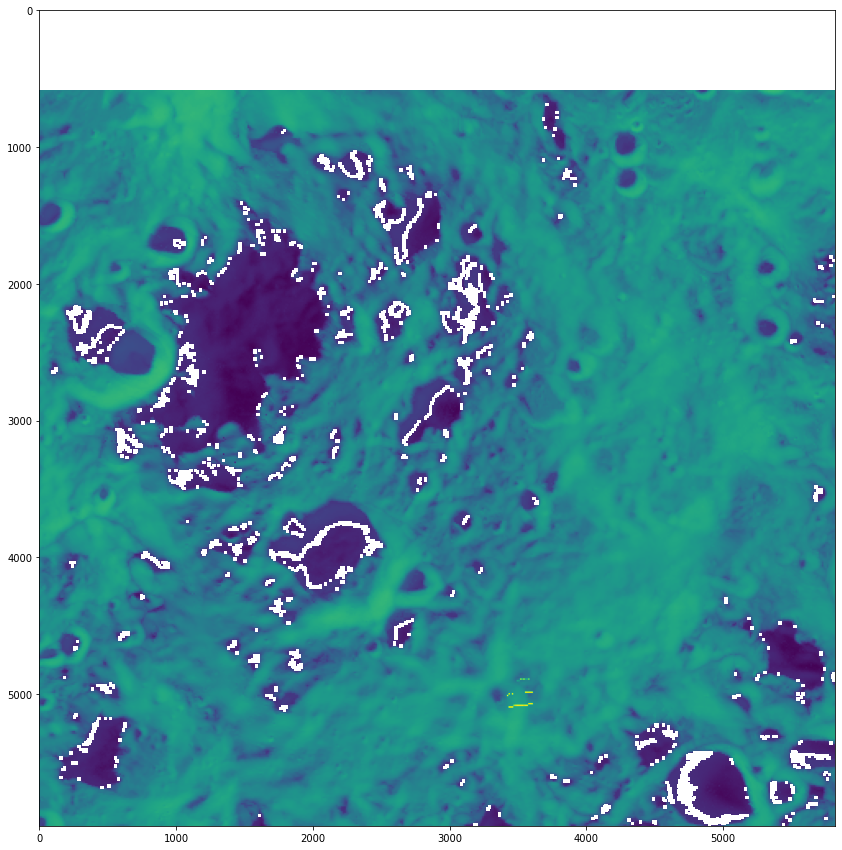

In [401]:
# arr=np.where((spTempSumMax_np>=106) & (spTempSumMax_np<110))

# row_indices=arr[0]
# col_indices=arr[1]
# indexes = (np.array(row_indices),np.array(col_indices))
# spTempSumMax_np[indexes]
fig, ax = plt.subplots(figsize=(15, 15))
masked_array_water = np.ma.masked_where(((spTempSumMax_np>=106) & (spTempSumMax_np<110)),spTempSumMax_np)

ax.imshow(masked_array_water,cmap="viridis")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


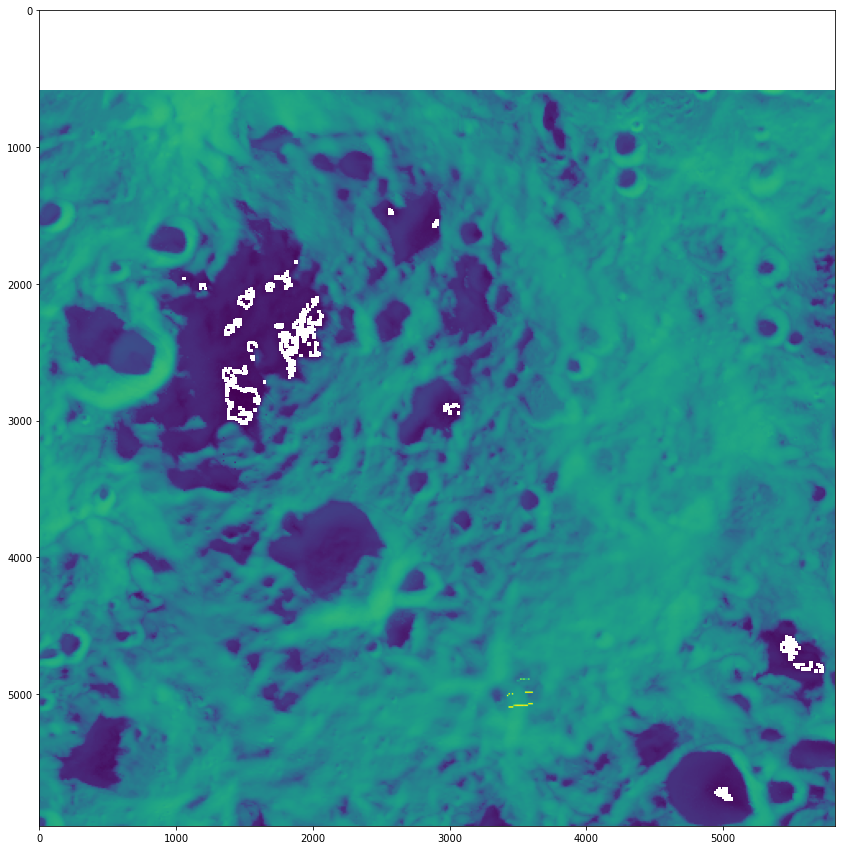

In [402]:
fig, ax = plt.subplots(figsize=(15, 15))
masked_array_ammonia = np.ma.masked_where(((spTempSumMax_np>=65.5) & (spTempSumMax_np<70)),spTempSumMax_np)

ax.imshow(masked_array_ammonia,cmap="viridis")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


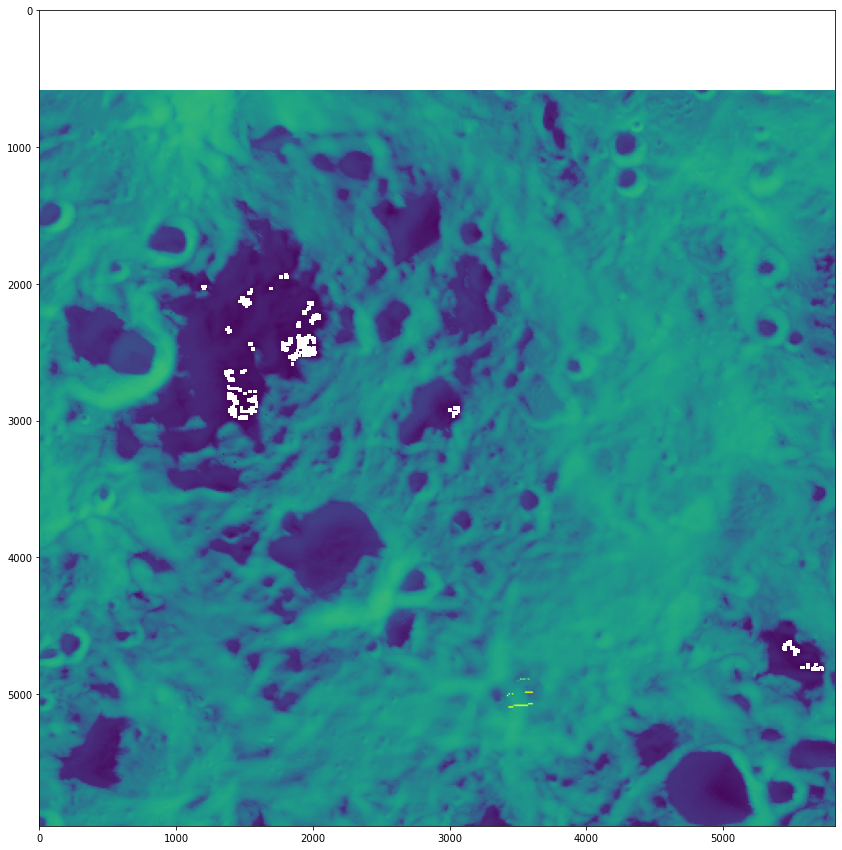

In [403]:
fig, ax = plt.subplots(figsize=(15, 15))
masked_array_sulfur_dioxide = np.ma.masked_where(((spTempSumMax_np>=62.3) & (spTempSumMax_np<65)),spTempSumMax_np)

ax.imshow(masked_array_sulfur_dioxide,cmap="viridis")
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


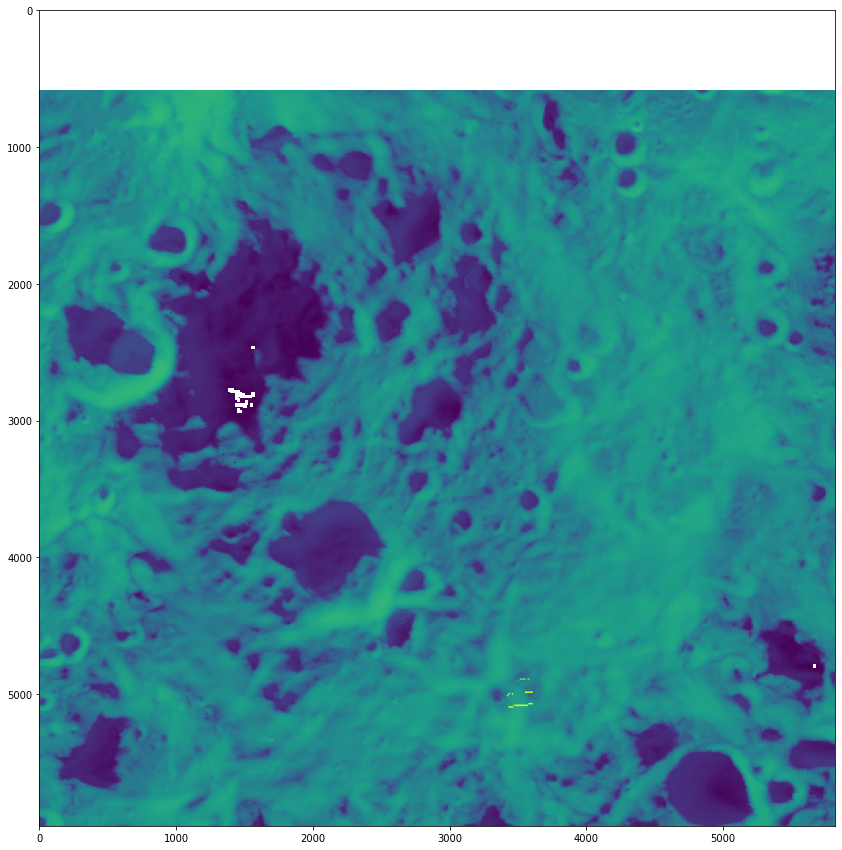

In [404]:
fig, ax = plt.subplots(figsize=(15, 15))
masked_array_carbon_dioxide = np.ma.masked_where(((spTempSumMax_np>=54.3) & (spTempSumMax_np<60)),spTempSumMax_np)

ax.imshow(masked_array_carbon_dioxide,cmap="viridis")
plt.show()

#Extra Stuff

In [405]:
#Attempts to apparent issue with the illumination and temperature not trending as expected.  

In [406]:
%cd /content/gdrive/Shared drives/GEOL557_Group_Project/data
%ls

/content/gdrive/Shared drives/GEOL557_Group_Project/data
AVGVISIB_85S_060M_201608_clp20m.tfw
AVGVISIB_85S_060M_201608_clp20m.tif
AVGVISIB_85S_201608_clp240m_stat.tfw
AVGVISIB_85S_201608_clp240m_stat.tif
AVGVIS_SUN60m.tif
polar_south_80_summer_max_sp240m_clp_float20m.tif
polar_south_80_summer_max_sp240m_clp_int16_20m.tfw
polar_south_80_summer_max_sp240m_clp_int16_20m.tif
polar_south_80_summer_max_sp240m_stat.tfw
polar_south_80_summer_max_sp240m_stat.tif
Shapefiles/
spoledem10m_clp20m.tfw
spoledem10m_clp20m.tif
spoledem10m_clp240m_stat.tfw
spoledem10m_clp240m_stat.tif
zold_data/


In [407]:
#Load Subsampled tif for statistics. These also have identical extents. 
with rio.open('spoledem10m_clp240m_stat.tif') as spDEM: #open the geotif file with RasterIO
      spDEMstat_np= spDEM.read(1)
      spDEMstat_plot_extent = plotting_extent(spDEM)
      
with rio.open('AVGVISIB_85S_201608_clp240m_stat.tif') as avgvis: #open the geotif file with RasterIO
      avgvisstat_np= avgvis.read(1)
      avgvisstat_plot_extent = plotting_extent(avgvis)

with rio.open('polar_south_80_summer_max_sp240m_stat.tif') as spTempSumMax: #open the geotif file with RasterIO
      spTempSumMaxstat_np= spTempSumMax.read(1)
      spTempSumMaxstat_plot_extent = plotting_extent(spTempSumMax)

In [408]:
print("DEM", spDEMstat_np.shape, "AvgVis", avgvisstat_np.shape, "Temp", spTempSumMaxstat_np.shape)

DEM (449, 485) AvgVis (449, 485) Temp (497, 485)


In [409]:
spTempSumMaxstat_np

array([[-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38],
       ...,
       [-3.4028235e+38,  1.3682758e+02,  1.3987830e+02, ...,
         1.9792020e+02,  2.0526607e+02, -3.4028235e+38],
       [-3.4028235e+38,  1.3362500e+02,  1.2985457e+02, ...,
         2.0436583e+02,  2.0892508e+02, -3.4028235e+38],
       [-3.4028235e+38, -3.4028235e+38, -3.4028235e+38, ...,
        -3.4028235e+38, -3.4028235e+38, -3.4028235e+38]], dtype=float32)

In [410]:
# from scipy import signal
spTempSumMax_flat = np.ndarray.flatten(spTempSumMaxstat_np)
spTempSumMax_flat = spTempSumMax_flat[np.logical_not(np.isnan(spTempSumMax_flat))]
spTempSumMax_flat.shape

(241045,)

In [411]:
avgvis_np_flat = np.ndarray.flatten(avgvisstat_np)
avgvis_np_flat = avgvis_np_flat[np.logical_not(np.isnan(avgvis_np_flat))]/25000*100 #drop the nan and bring the range back to 0 to 1
avgvis_np_flat.shape

(217765,)

In [412]:
# subsample two flat arrays
idx = np.random.randint( 0, avgvis_np_flat.shape[0], 1000)
spTempSumMax_flat_rand = spTempSumMax_flat[idx]
avgvis_np_flat_rand = avgvis_np_flat[idx]

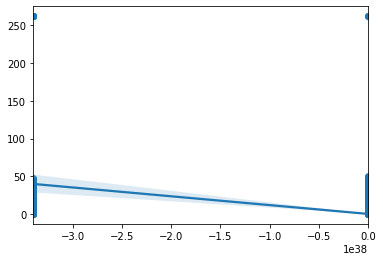

In [413]:
#regression order= Is slighly better on the high end but worse on the low end. 
sns.regplot(x=spTempSumMax_flat_rand,y=avgvis_np_flat_rand, order=1);

In [414]:
#https://stackoverflow.com/questions/19485641/python-random-sample-of-two-arrays-but-matching-indices

x = np.arange(1e8)
y = np.arange(1e8)
idx = np.random.randint(0, x.shape[0], 10000)
#x[idx]
y[idx]


array([72378264., 94208182., 85882050., ..., 58552178., 41265746.,
       70338168.])

Extra Stuff for a Plot

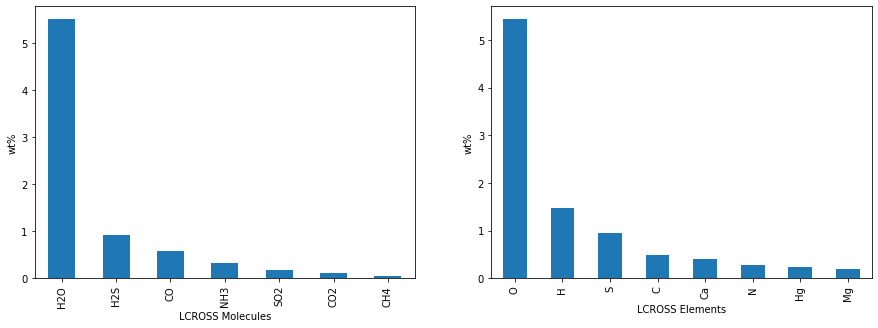

In [415]:
#We will place the molecular and elemental plots side by side in the final version. 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[15,5])
df[["Symbol","Concentration (wt%)"]].plot(ax=axes[0], x='Symbol', kind='bar', legend=False, ylabel='wt%', xlabel='LCROSS Molecules')
df_elem_sort[["Element", "ElementWt%"]].plot(ax=axes[1], x='Element', kind='bar',legend=False, ylabel='wt%', xlabel='LCROSS Elements')
plt.show()

Create Nice PDF from Ian McBride

In [416]:
#Plotting
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (1.19.2.4~dfsg-1build4).
texlive is already the newest version (2017.20180305-1).
texlive-latex-extra is already the newest version (2017.20180305-2).
texlive-xetex is already the newest version (2017.20180305-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.


In [417]:
%pwd
#%cd /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/
#%ls

'/content/gdrive/Shared drives/GEOL557_Group_Project/data'

In [421]:
!jupyter nbconvert --to pdf /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06.ipynb

[NbConvertApp] Converting notebook /content/gdrive/Shareddrives/GEOL557_Group_Project/notebooks/Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06.ipynb to pdf
[NbConvertApp] Support files will be in Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files/
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCROSS_Grids_Stats_2020-12-06_files
[NbConvertApp] Making directory ./Week6_Moon_Group_LCR